In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.applications.vgg16 import VGG16
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array, load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array #Updated import statement to avoid error

In [ ]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Data** **Augmentation**

In [ ]:
import os
import cv2
import numpy as np
from albumentations import Compose, HorizontalFlip, RandomBrightnessContrast, Rotate, ShiftScaleRotate, Blur
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/OnlineHarmProject/Train.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/OnlineHarmProject/Test.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# import shutil
# import os

# def copy_folder(src_folder, dest_folder):
#     if not os.path.exists(src_folder):
#         print(f"Source folder '{src_folder}' does not exist.")
#         return

#     if not os.path.exists(dest_folder):
#         os.makedirs(dest_folder)

#     for file_name in os.listdir(src_folder):
#         src_path = os.path.join(src_folder, file_name)
#         dest_path = os.path.join(dest_folder, file_name)

#         if os.path.isfile(src_path):
#             shutil.copy2(src_path, dest_path)  # copy2 preserves metadata
#             print(f"Copied: {src_path} -> {dest_path}")

# # Example usage
# copy_folder("/content/Train/Harmful Content", "/content/Test/Harmful Content")
# copy_folder("/content/Train/Safe Content", "/content/Test/Safe Content")


In [ ]:
# Define augmentation pipeline
augmentation = Compose([
    HorizontalFlip(p=0.5),
    RandomBrightnessContrast(p=0.5),
    Rotate(limit=30, p=0.5),
    ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
    Blur(blur_limit=3, p=0.2),
])

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
def augment_and_save_images(input_folder, output_folder, num_augmented=5):
    os.makedirs(output_folder, exist_ok=True)
    for img_name in tqdm(os.listdir(input_folder)):
        img_path = os.path.join(input_folder, img_name)
        image = cv2.imread(img_path)
        if image is None:
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        for i in range(num_augmented):
            augmented = augmentation(image=image)['image']
            aug_img_name = f"aug_{i}_{img_name}"
            aug_img_path = os.path.join(output_folder, aug_img_name)
            cv2.imwrite(aug_img_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

In [ ]:
# Paths
train_dir = "/content/Train"
aug_train_dir = "/content/aug_train"

In [ ]:
for class_name in ["/content/Train/Harmful Content", "/content/Train/Safe Content"]:
    input_class_dir = os.path.join(train_dir, class_name)
    output_class_dir = os.path.join(aug_train_dir, f"aug_{class_name}")
    augment_and_save_images(input_class_dir, output_class_dir, num_augmented=5)

100%|██████████| 552/552 [00:14<00:00, 37.51it/s]


In [ ]:
import os
import shutil

def move_files(source_folder, destination_folder):
    """Move all files from source_folder to destination_folder."""
    os.makedirs(destination_folder, exist_ok=True)  # Ensure destination exists

    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)

        if os.path.isfile(source_path):  # Check if it's a file
            shutil.move(source_path, destination_path)
            print(f"Moved: {filename} -> {destination_folder}")

# Example usage:
source_folder = "/content/aug_train/aug_/content/Train/Safe Content"  # Update with your actual source path
destination_folder = "/content/Train/Safe Content"  # Update with your actual destination path
move_files(source_folder, destination_folder)

Moved: aug_0_image-397.jpg -> /content/Train/Safe Content
Moved: aug_0_image-226.jpg -> /content/Train/Safe Content
Moved: aug_3_image-348.jpg -> /content/Train/Safe Content
Moved: aug_2_image-414.jpg -> /content/Train/Safe Content
Moved: aug_1_image-174.jpg -> /content/Train/Safe Content
Moved: aug_1_image-318.jpg -> /content/Train/Safe Content
Moved: aug_0_image-141.jpg -> /content/Train/Safe Content
Moved: aug_2_image-91.jpg -> /content/Train/Safe Content
Moved: aug_3_image-165.jpg -> /content/Train/Safe Content
Moved: aug_3_image-453.jpg -> /content/Train/Safe Content
Moved: aug_1_image-73.jpg -> /content/Train/Safe Content
Moved: aug_0_image-284.jpg -> /content/Train/Safe Content
Moved: aug_4_image-401.jpg -> /content/Train/Safe Content
Moved: aug_2_53_COVERBLOG_1280x720.jpg -> /content/Train/Safe Content
Moved: aug_4_image-59.jpg -> /content/Train/Safe Content
Moved: aug_0_image-228.jpg -> /content/Train/Safe Content
Moved: aug_0_image-84.jpg -> /content/Train/Safe Content
Moved:

In [ ]:
import os
import shutil

def move_files(source_folder, destination_folder):
    """Move all files from source_folder to destination_folder."""
    os.makedirs(destination_folder, exist_ok=True)  # Ensure destination exists

    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)

        if os.path.isfile(source_path):  # Check if it's a file
            shutil.move(source_path, destination_path)
            print(f"Moved: {filename} -> {destination_folder}")

source_folder = "/content/aug_train/aug_/content/Train/Harmful Content"  # Update with your actual source path
destination_folder = "/content/Train/Harmful Content"  # Update with your actual destination path
move_files(source_folder, destination_folder)

**Model Building and** **Traning**

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Train',
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/Test',
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary'
)

Found 8508 images belonging to 2 classes.
Found 543 images belonging to 2 classes.


In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base.layers:
  print(layer.name, layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(180,180)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(180,180)
)

Found 8508 files belonging to 2 classes.
Found 543 files belonging to 2 classes.


In [ ]:
# Normalise
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Define EarlyStopping
# early_stopping = EarlyStopping(
#     monitor='val_loss',  # Metric to monitor
#     patience=5,          # Number of epochs with no improvement to wait
#     restore_best_weights=True  # Restore best model weights
# )

In [ ]:
history = model.fit(train_ds, epochs=4, validation_data=validation_ds)

Epoch 1/4
266/266 ━━━━━━━━━━━━━━━━━━━━ 85s 271ms/step - accuracy: 0.8781 - loss: 0.2881 - val_accuracy: 0.9632 - val_loss: 0.1069
Epoch 2/4
266/266 ━━━━━━━━━━━━━━━━━━━━ 44s 166ms/step - accuracy: 0.9776 - loss: 0.0632 - val_accuracy: 0.9613 - val_loss: 0.0904
Epoch 3/4
266/266 ━━━━━━━━━━━━━━━━━━━━ 43s 163ms/step - accuracy: 0.9908 - loss: 0.0292 - val_accuracy: 0.9687 - val_loss: 0.1040
Epoch 4/4
266/266 ━━━━━━━━━━━━━━━━━━━━ 83s 166ms/step - accuracy: 0.9973 - loss: 0.0110 - val_accuracy: 0.9595 - val_loss: 0.1295


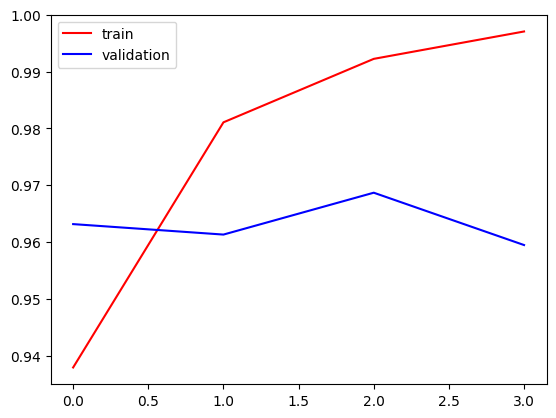

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
def predFun(img_path, model, show_img=0):
  if(show_img == 1):
    # Load the image using mpimg.imread
    img = mpimg.imread(img_path)

    # Display the image using plt.imshow
    plt.imshow(img)
    plt.show()

  img = load_img(img_path, target_size=(180, 180))  # Resize the image

  # Convert the image to a NumPy array
  img_array = img_to_array(img)

  # Reshape the array to match the model's input shape
  img_array = img_array.reshape(1, 180, 180, 3)  # Add batch and channel dimensions

  # Normalize the pixel values
  img_array = img_array / 255.0  # Assuming pixel values are in the range [0, 255]

  # Make the prediction
  prediction = model.predict(img_array)

  if prediction > 0.4 : print("Safe Content")
  else: print("Harmful Content")
  print(prediction)

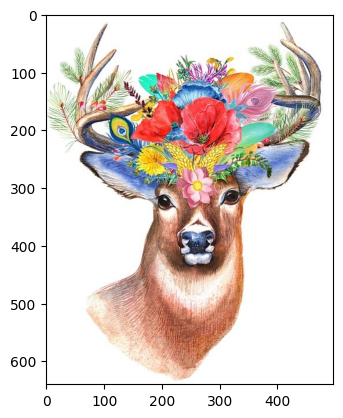

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Safe Content
[[0.999749]]


In [ ]:
predFun('/content/Test/Safe Content/image-565.jpg', model, 1)

In [ ]:
import torch # import torch

# from google.colab import drive
# drive.mount('/content/drive')

# Save the model in Google Drive
model.save('/content/drive/MyDrive/latestmodel.h5')
# torch.save(model.state_dict(), '/content/drive/MyDrive/model_weights.pth') #Now torch is accessible and the save operation should work
# Removed the line causing the error as it's not applicable to Keras models
# The model is already saved with architecture and weights in 'model.h5' using model.save()

In [ ]:
!pip install huggingface_hub


In [ ]:
from huggingface_hub import notebook_login

notebook_login()


In [ ]:
 from huggingface_hub import upload_file

upload_file(
    path_or_fileobj="/content/drive/MyDrive/latestmodel.h5",  # Path to your model file
    path_in_repo="latestmodel.h5",  # File name in Hugging Face repo
    repo_id="HariomNagar/imageharmdetector"  # Replace with your actual username and repo
)


latestmodel.h5:   0%|          | 0.00/100M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/HariomNagar/imageharmdetector/commit/97eec55e5d764d201e8dbf29e368f62a5a868a2d', commit_message='Upload latestmodel.h5 with huggingface_hub', commit_description='', oid='97eec55e5d764d201e8dbf29e368f62a5a868a2d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/HariomNagar/imageharmdetector', endpoint='https://huggingface.co', repo_type='model', repo_id='HariomNagar/imageharmdetector'), pr_revision=None, pr_num=None)

In [ ]:
from huggingface_hub import hf_hub_download
import tensorflow as tf

# Download the model from Hugging Face
model_path = hf_hub_download(repo_id="HariomNagar/imageharmdetector", filename="latestmodel.h5")

# Load the model
model = tf.keras.models.load_model(model_path)

# Check model summary
model.summary()


latestmodel.h5:   0%|          | 0.00/100M [00:00<?, ?B/s]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 5, 5, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,361,539 (62.41 MB)

 Trainable params: 8,726,273 (33.29 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
img_path = "/content/Test/Harmful Content/025_3357751_66fc8b3_300x_.jpg"

In [ ]:
# Load the image using mpimg.imread
img = mpimg.imread(img_path)

# Display the image using plt.imshow
plt.imshow(img)
plt.show()

img = load_img(img_path, target_size=(180, 180))  # Resize the image

# Convert the image to a NumPy array
img_array = img_to_array(img)

# Reshape the array to match the model's input shape
img_array = img_array.reshape(1, 180, 180, 3)  # Add batch and channel dimensions

# Normalize the pixel values
img_array = img_array / 255.0  # Assuming pixel values are in the range [0, 255]

# Make the prediction
prediction = model.predict(img_array)

if prediction > 0.4 : print("Safe Content")
else: print("Harmful Content")
print(prediction)